In [26]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from fig_utils import *

import sys
sys.path.append('../')
from scluster import KSpectralClustering, SpectralClustering
from kkmeans import KKernelClustering, k_polynomial, k_tanh, k_gaussian
from synthetic import generate_ring_2d

In [2]:
# PARAMS
n_samples = 1000
seed_val = 0

In [40]:
# make the datasets
np.random.seed(seed_val)
noisy_circles = np.vstack((generate_ring_2d(700, 2, 0.2), generate_ring_2d(300, 0, 0.3)))
#noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)

In [13]:
def get_kernel_grid(X_train, k, xlim, ylim, res, kernel=np.dot):
    x = np.linspace(*xlim, res[0])
    y = np.linspace(*ylim, res[1])
    X, Y = np.meshgrid(x,y)
    pts = np.vstack((X.flatten(), Y.flatten())).T
    cluster = KKernelClustering(k, 100, kernel)
    cluster.train(X_train)
    labels = cluster.classify(pts, thresh=True)
    return X, Y, np.reshape(labels, X.shape)

In [14]:
X, Y, k_linear_grid = get_kernel_grid(blobs[0], 3, [-13, 13], [-13, 13], [100, 100])

In [18]:
X, Y, k_gaussian_grid = get_kernel_grid(blobs[0], 3, [-13, 13], [-13, 13], [100, 100], kernel=lambda x,y: k_gaussian(x, y, 1.0))

In [70]:
X, Y, k_tanh_grid = get_kernel_grid(blobs[0], 3, [-13, 13], [-13, 13], [100, 100], kernel=lambda x,y: k_tanh(x, y, .1, .1))

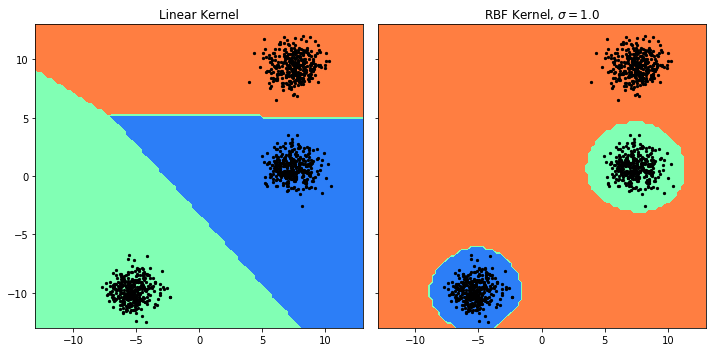

In [24]:
fig, ax = plt.subplots(figsize=(10,5),ncols=2, sharey=True)
ax[0].scatter(*blobs[0].T, zorder=100, s=5, c='k')
ax[0].contourf(X, Y, k_linear_grid,2,  cmap='rainbow')
ax[0].set_title("Linear Kernel")
ax[0].set_xlim(np.min(X), np.max(X))
ax[0].set_ylim(np.min(Y), np.max(Y))
ax[1].scatter(*blobs[0].T, zorder=100, s=5, c='k')
ax[1].contourf(X, Y, k_gaussian_grid, 2, cmap='rainbow')
ax[1].set_title("RBF Kernel, $\sigma=1.0$")
ax[1].set_xlim(np.min(X), np.max(X))
ax[1].set_ylim(np.min(Y), np.max(Y))
plt.tight_layout()
plt.show()

In [45]:
X, Y, k_circles_gaussian_grid = get_kernel_grid(noisy_circles, 2, [-2.5, 2.5], [-2.5, 2.5], [100, 100], kernel=lambda x,y: k_gaussian(x, y, .7))

In [50]:
X, Y, k_circles_linear_grid = get_kernel_grid(noisy_circles, 2, [-2.5, 2.5], [-2.5, 2.5], [100, 100], kernel=lambda x,y: np.dot(x,y))

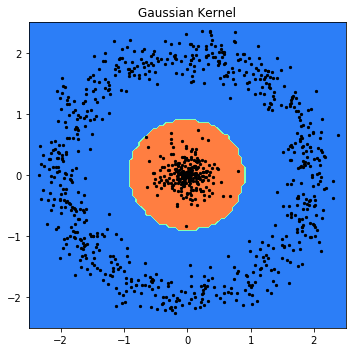

In [49]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(*noisy_circles.T, zorder=100, s=5, c='k')
ax.contourf(X, Y, k_circles_gaussian_grid,2,  cmap='rainbow')
ax.set_title("Gaussian Kernel")
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(np.min(Y), np.max(Y))
plt.tight_layout()
plt.show()

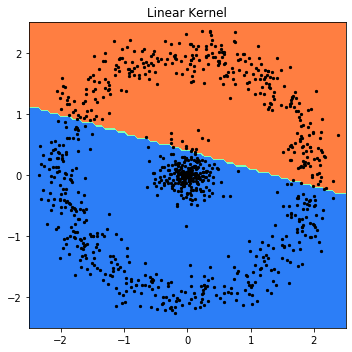

In [51]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(*noisy_circles.T, zorder=100, s=5, c='k')
ax.contourf(X, Y, k_circles_linear_grid,2,  cmap='rainbow')
ax.set_title("Linear Kernel")
ax.set_xlim(np.min(X), np.max(X))
ax.set_ylim(np.min(Y), np.max(Y))
plt.tight_layout()
plt.show()

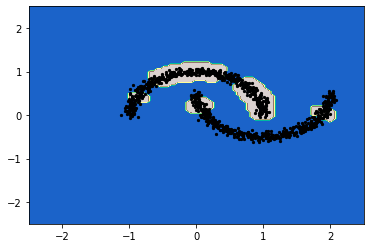

In [120]:
plt.figure()
plt.scatter(*noisy_moons[0].T, zorder=100, s=5, c='k')
plt.contourf(X, Y, k_moons_gaussian_grid,  cmap='terrain')
plt.show()

In [31]:
noisy_circles.shape

(2, 1400)